In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  confusion_matrix, roc_auc_score, roc_curve

In [3]:
#Contain two datasets
app_data = pd.read_csv('Downloads/application_record.csv')
credit_data = pd.read_csv('Downloads/credit_record.csv')

# Step 1: Cleaning and Preprocessing the dataset

In [4]:
# Applicant data
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
#Credit data
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## Cleaning the dataset:
### Checking Unique Values

In [6]:
app_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [7]:
app_data.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [4]:
app_data.drop_duplicates('ID', keep='last', inplace=True)

In [5]:
app_data.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,1.000000,-0.005174,0.011114,-0.004946,-0.002490,NaN,-0.023303,-0.019040,0.032862,-0.001873
CNT_CHILDREN,-0.005174,1.000000,0.019139,0.349080,-0.241528,NaN,0.038403,-0.038285,0.028459,0.884780
AMT_INCOME_TOTAL,0.011114,0.019139,1.000000,0.053781,-0.141278,NaN,-0.033632,0.004455,0.112083,0.011415
DAYS_BIRTH,-0.004946,0.349080,0.053781,1.000000,-0.617896,NaN,0.171829,-0.038031,0.096755,0.306159
DAYS_EMPLOYED,-0.002490,-0.241528,-0.141278,-0.617896,1.000000,NaN,-0.232205,0.004888,-0.074355,-0.234358
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023303,0.038403,-0.033632,0.171829,-0.232205,NaN,1.000000,0.290090,-0.060934,0.049757
FLAG_PHONE,-0.019040,-0.038285,0.004455,-0.038031,0.004888,NaN,0.290090,1.000000,-0.001164,-0.024241
FLAG_EMAIL,0.032862,0.028459,0.112083,0.096755,-0.074355,NaN,-0.060934,-0.001164,1.000000,0.022052
CNT_FAM_MEMBERS,-0.001873,0.884780,0.011415,0.306159,-0.234358,NaN,0.049757,-0.024241,0.022052,1.000000


In [6]:
# Dropping unwanted columns
app_data.drop(['OCCUPATION_TYPE','FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_MOBIL', 'CNT_CHILDREN'],\
              axis=1, inplace=True)

In [11]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   AMT_INCOME_TOTAL     438510 non-null  float64
 5   NAME_INCOME_TYPE     438510 non-null  object 
 6   NAME_EDUCATION_TYPE  438510 non-null  object 
 7   NAME_FAMILY_STATUS   438510 non-null  object 
 8   NAME_HOUSING_TYPE    438510 non-null  object 
 9   DAYS_BIRTH           438510 non-null  int64  
 10  DAYS_EMPLOYED        438510 non-null  int64  
 11  CNT_FAM_MEMBERS      438510 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 43.5+ MB


### Identifying null values

In [7]:
app_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
dtype: int64

In [8]:
credit_data.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### Columns Manipulation

In [14]:
app_data.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
CNT_FAM_MEMBERS        float64
dtype: object

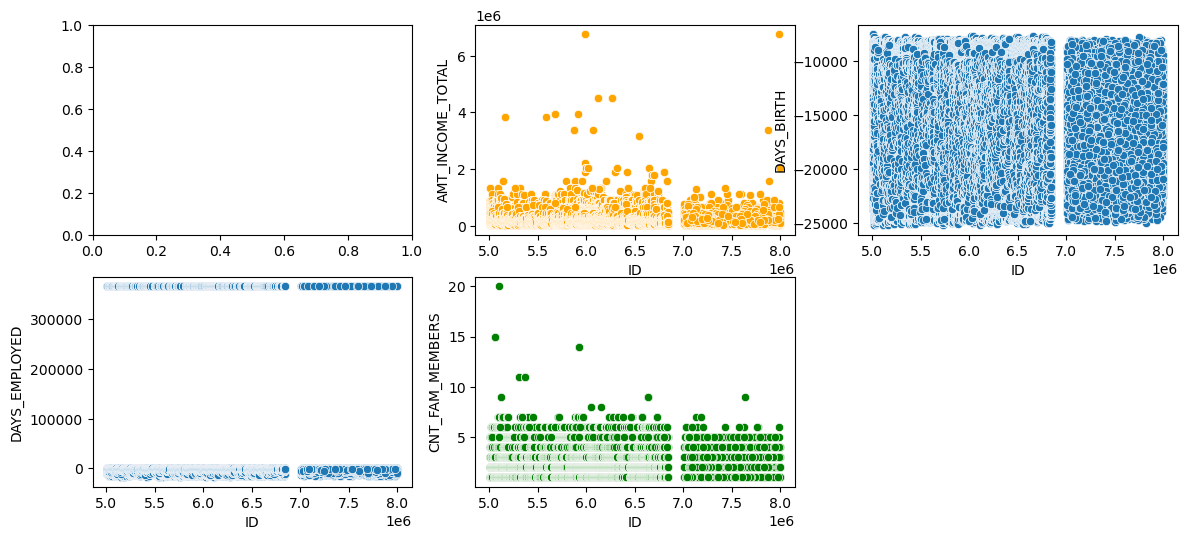

In [9]:
# Identifying the outliers 
# Using Scatter Plot
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

# sns.scatterplot(x = 'ID', y = 'CNT_CHILDREN', data = app_data, ax = ax[0][0], color = 'red')
sns.scatterplot(x = 'ID', y ='AMT_INCOME_TOTAL', data = app_data, ax = ax[0][1], color ='orange')
sns.scatterplot(x = 'ID', y ='DAYS_BIRTH', data = app_data, ax = ax[0][2])
sns.scatterplot(x = 'ID', y ='DAYS_EMPLOYED', data = app_data, ax = ax[1][0])
sns.scatterplot(x = 'ID', y ='CNT_FAM_MEMBERS', data = app_data, ax = ax[1][1], color = 'green')
fig.delaxes(ax[1][2])


In [16]:
# for boxplot
# fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

# sns.boxplot(x = 'CNT_CHILDREN', data = app_data, ax = ax[0][0])
# sns.boxplot(x = 'AMT_INCOME_TOTAL', data = app_data, ax = ax[0][1], color ='orange')
# sns.boxplot(x ='DAYS_BIRTH', data = app_data, ax = ax[0][2])
# sns.boxplot(x ='DAYS_EMPLOYED', data = app_data, ax = ax[1][0])
# sns.boxplot(x ='CNT_FAM_MEMBERS', data = app_data, ax = ax[1][1], color = 'green')
# fig.delaxes(ax[1][2])

As we can see, there are outliers in the dataset, we need to remove them. So that, they wont effect the efficiency of the model.

In [17]:
# # for CNT_CHILDREN
# q_hi = app_data['CNT_CHILDREN'].quantile(0.999)
# q_low = app_data['CNT_CHILDREN'].quantile(0.001)
# app_data = app_data[(app_data['CNT_CHILDREN']>q_low) & (app_data['CNT_CHILDREN']<q_hi)]

In [10]:
# for AMT_INCOME_TOTAL
q_hi = app_data['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app_data['AMT_INCOME_TOTAL'].quantile(0.001)
app_data = app_data[(app_data['AMT_INCOME_TOTAL']>q_low) & (app_data['AMT_INCOME_TOTAL']<q_hi)]

In [11]:
# for CNT_FAM_MEMBERS
q_hi = app_data['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app_data['CNT_FAM_MEMBERS'].quantile(0.001)
app_data = app_data[(app_data['CNT_FAM_MEMBERS']>q_low) & (app_data['CNT_FAM_MEMBERS']<q_hi)]

Again reviewing the columns with outliers removed

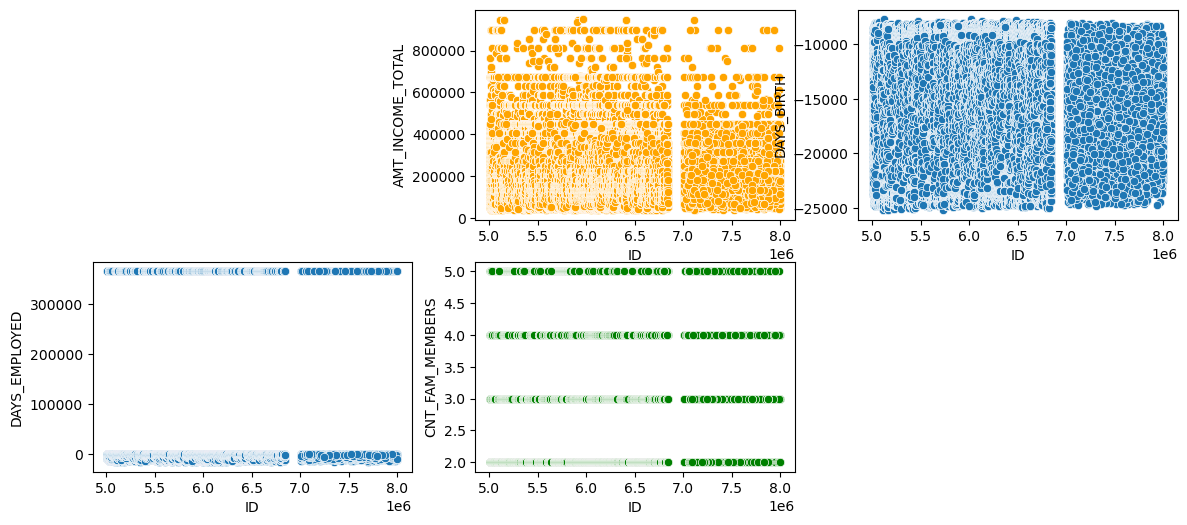

In [12]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

# sns.scatterplot(x = 'ID', y = 'CNT_CHILDREN', data = app_data, ax = ax[0][0], color = 'red')
sns.scatterplot(x = 'ID', y ='AMT_INCOME_TOTAL', data = app_data, ax = ax[0][1], color ='orange')
sns.scatterplot(x = 'ID', y ='DAYS_BIRTH', data = app_data, ax = ax[0][2])
sns.scatterplot(x = 'ID', y ='DAYS_EMPLOYED', data = app_data, ax = ax[1][0])
sns.scatterplot(x = 'ID', y ='CNT_FAM_MEMBERS', data = app_data, ax = ax[1][1], color = 'green')
fig.delaxes(ax[1][2])
fig.delaxes(ax[0][0])


In [21]:
# for boxplot
# fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

# sns.boxplot(x = 'CNT_CHILDREN', data = app_data, ax = ax[0][0])
# sns.boxplot(x = 'AMT_INCOME_TOTAL', data = app_data, ax = ax[0][1], color ='orange')
# sns.boxplot(x ='DAYS_BIRTH', data = app_data, ax = ax[0][2])
# sns.boxplot(x ='DAYS_EMPLOYED', data = app_data, ax = ax[1][0])
# sns.boxplot(x ='CNT_FAM_MEMBERS', data = app_data, ax = ax[1][1], color = 'green')
# fig.delaxes(ax[1][2])

In [13]:
credit_data['STATUS'].values

array(['X', '0', '0', ..., 'C', 'C', 'C'], dtype=object)

In [14]:
credit_data['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [15]:
credit_data['STATUS'].replace({'C':-1, 'X':-1}, inplace=True)
credit_data['STATUS'] = credit_data['STATUS'].astype('int')
credit_data['STATUS'] = credit_data['STATUS'].apply(lambda x:1 if x > 0 else 0)

In [16]:
credit_data['STATUS'].value_counts(normalize = True)

0    0.986464
1    0.013536
Name: STATUS, dtype: float64

In [17]:
credit_data.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                2
dtype: int64

In [18]:
credit_data.drop(['MONTHS_BALANCE'], axis = 1, inplace = True)

In [19]:
credit_data.head()

,ID,STATUS
0,5001711,0
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0


In [20]:
# Since the credit dataset has multiple values for same ID, we need to group the data using ID, to simplify model building
credit_final = credit_data.groupby('ID').agg(max).reset_index()

In [21]:
credit_final

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


### Merging the two datasets

In [22]:
final_data = app_data.join(credit_final.set_index('ID'), on='ID', how='inner')

In [23]:
final_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,1
1,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,1
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,0
10,5008815,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,2.0,0
11,5112956,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,2.0,0


In [33]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29313 entries, 0 to 434811
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29313 non-null  int64  
 1   CODE_GENDER          29313 non-null  object 
 2   FLAG_OWN_CAR         29313 non-null  object 
 3   FLAG_OWN_REALTY      29313 non-null  object 
 4   AMT_INCOME_TOTAL     29313 non-null  float64
 5   NAME_INCOME_TYPE     29313 non-null  object 
 6   NAME_EDUCATION_TYPE  29313 non-null  object 
 7   NAME_FAMILY_STATUS   29313 non-null  object 
 8   NAME_HOUSING_TYPE    29313 non-null  object 
 9   DAYS_BIRTH           29313 non-null  int64  
 10  DAYS_EMPLOYED        29313 non-null  int64  
 11  CNT_FAM_MEMBERS      29313 non-null  float64
 12  STATUS               29313 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 3.1+ MB


In [24]:
# Splitting data into i/p and o/p variables
x = final_data.iloc[:,1:-1]
y = final_data['STATUS']

In [25]:
x.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0
10,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,2.0
11,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,2.0


We are going to use Logistic Regression model for our dataset but prior to that we need to further transform these columns. Like, converting categorical columns to numerical columns and standardizing the columns.

In [26]:
ct = ColumnTransformer([('enc', OneHotEncoder(sparse = False), [col for col in x.columns if x[col].dtypes == 'object']),\
                           ('scaler', StandardScaler(), [3,9,8])], verbose = True)

In [27]:
X = pd.DataFrame(ct.fit_transform(x))

[ColumnTransformer] ........... (1 of 2) Processing enc, total=   0.1s
[ColumnTransformer] ........ (2 of 2) Processing scaler, total=   0.0s


In [28]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.43780,-0.427153,0.934819
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.43780,-0.427153,0.934819
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.74910,-0.400888,-1.426696
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.84435,-0.398075,-0.278983
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.84435,-0.398075,-0.278983


Now, all we have is numerical columns which make it easy for our model to predict

In [41]:
y.value_counts(normalize = True)

0    0.882509
1    0.117491
Name: STATUS, dtype: float64

As this independent variable (y) has uneven distribution, we need to perform either under-sampling or over-sampling.

# Step 2: Model building

In [42]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Without changing the sample proportion
# log_reg = LogisticRegression(fit_intercept=True, solver='saga')
# log_reg.fit(x_train, y_train)

# yp = pd.DataFrame(log_reg.predict(x_test))
# print('Total elements in predicted y :', yp.shape[0],'\nUnique elements in predicted y :', yp.value_counts())

# log_reg.score(x_train, y_train)

# log_reg.score(x_test, y_test)

### For Oversampling , we are going to use ADASYN (extension of smote)

In [29]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
x_sampled, y_sampled = ada.fit_resample(X, y)

In [30]:
y_sampled.value_counts(normalize = True)

0    0.507166
1    0.492834
Name: STATUS, dtype: float64

In [31]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_sampled, y_sampled, random_state=42, test_size=.25)

In [33]:
log_reg = LogisticRegression(solver='saga')

log_reg.fit(x1_train, y1_train)

LogisticRegression(solver='saga')

In [36]:
y_pred = log_reg.predict(x1_test)

In [54]:
print('Total elements in predicted y :', y_pred.shape[0],' \
      \nUnique elements in predicted y:\n',pd.DataFrame(y_pred).value_counts())
# np.unique(y_pred, return_counts=True)

Total elements in predicted y : 12752        
Unique elements in predicted y:
 0    6863
1    5889
dtype: int64


In [34]:
print('Training Score : ',log_reg.score(x1_train, y1_train))
print('Testing Score : ',log_reg.score(x1_test, y1_test))

Training Score :  0.5272774800679649
Testing Score :  0.521094730238394


In [37]:
print(classification_report(y_pred, y1_test))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      6863
           1       0.48      0.51      0.50      5889

    accuracy                           0.52     12752
   macro avg       0.52      0.52      0.52     12752
weighted avg       0.52      0.52      0.52     12752



#### This is reasonable score but not a good one. Let's try using complex model like Random Forest or Decision Trees etc

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)
clf.fit(x1_train, y1_train)
print('Training Score : ',clf.score(x1_train, y1_train))
print('Testing Score : ',clf.score(x1_test, y1_test))

Training Score :  0.6067180760684878
Testing Score :  0.5968475533249686


In [40]:
print(classification_report(clf.predict(x1_test), y1_test))

              precision    recall  f1-score   support

           0       0.48      0.64      0.55      4915
           1       0.72      0.57      0.63      7837

    accuracy                           0.60     12752
   macro avg       0.60      0.60      0.59     12752
weighted avg       0.63      0.60      0.60     12752



In [64]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [75]:
param_grid = {'max_depth' : range(3,18,2), 'max_features' : ['sqrt', 'log2', None], \
               'n_estimators' : range(20,101,20), }
grid = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose = True)
grid.fit(x1_train, y1_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              random_state=42),
             param_grid={'max_depth': range(3, 18, 2),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': range(20, 101, 20)},
             verbose=True)

In [76]:
grid.best_params_

{'max_depth': 17, 'max_features': None, 'n_estimators': 80}

In [77]:
print('Training Score : ',grid.score(x1_train, y1_train))
print('Testing Score : ',grid.score(x1_test, y1_test))

Training Score :  0.8697947980656123
Testing Score :  0.8277917189460476


In [78]:
print(classification_report(grid.predict(x1_test), y1_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      6286
           1       0.84      0.81      0.83      6466

    accuracy                           0.83     12752
   macro avg       0.83      0.83      0.83     12752
weighted avg       0.83      0.83      0.83     12752



In [43]:
clf_tuned = RandomForestClassifier(max_depth=17, max_features=None, n_estimators=80,random_state=42, n_jobs=-1)
clf_tuned.fit(x1_train, y1_train)
print('Training Score : ',clf_tuned.score(x1_train, y1_train))
print('Testing Score : ',clf_tuned.score(x1_test, y1_test))

Training Score :  0.8697947980656123
Testing Score :  0.8277917189460476


In [44]:
print(classification_report(clf_tuned.predict(x1_test), y1_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      6286
           1       0.84      0.81      0.83      6466

    accuracy                           0.83     12752
   macro avg       0.83      0.83      0.83     12752
weighted avg       0.83      0.83      0.83     12752



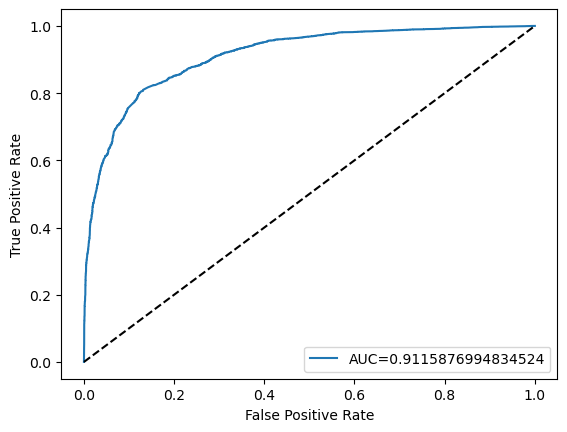

In [50]:
ycp_prob = clf_tuned.predict_proba(x1_test)[::,1] 
fpr, tpr, _ = roc_curve(y1_test,  ycp_prob)
auc = roc_auc_score(y1_test, ycp_prob)

#Auc plot
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [52]:
with open('model.pkl', 'wb') as file:
    dill.dump(clf_tuned, file)

In [65]:
label_encoder = LabelEncoder()
for col in [col for col in x.columns if x[col].dtypes == 'object']:
    x[col] = label_encoder.fit_transform(x[col])

x['Age'] = -(x['DAYS_BIRTH'])//365
x.drop(columns = 'DAYS_BIRTH', axis=1, inplace = True)

In [69]:
x.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,Age
0,1,1,1,427500.0,4,1,0,4,-4542,2.0,32
1,1,1,1,427500.0,4,1,0,4,-4542,2.0,32
2,1,1,1,112500.0,4,4,1,1,-1134,2.0,58
10,1,1,1,270000.0,4,1,1,1,-769,2.0,46
11,1,1,1,270000.0,4,1,1,1,-769,2.0,46


In [70]:
x_sampled, y_sampled = ada.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.3, random_state=42)


In [71]:
pipe = Pipeline([('scaler', StandardScaler()),\
                 ('model', RandomForestClassifier(max_depth=17, max_features=None, n_estimators=80,random_state=42, n_jobs=-1))
                ], verbose = True)
pipe.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.7s


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=17, max_features=None,
                                        n_estimators=80, n_jobs=-1,
                                        random_state=42))],
         verbose=True)

In [72]:
print('Training Score : ',pipe.score(X_train, y_train))
print('Testing Score : ',pipe.score(X_test, y_test))

Training Score :  0.9279984237340614
Testing Score :  0.8821752265861027


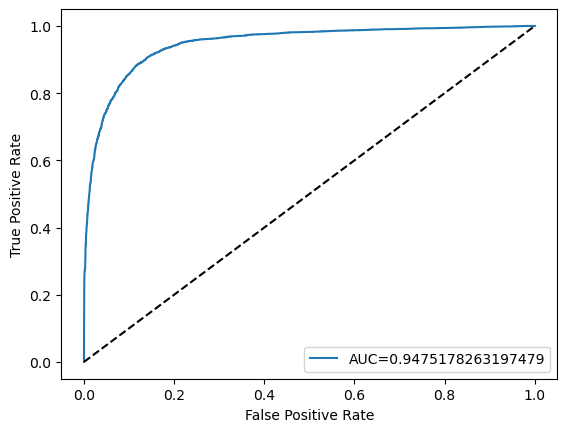

In [73]:
ycp_prob = pipe.predict_proba(X_test)[::,1] 
fpr, tpr, _ = roc_curve(y_test,  ycp_prob)
auc = roc_auc_score(y_test, ycp_prob)

#Auc plot
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [ ]:
with open('model.pkl', 'wb') as file:
    dill.dump(clf_tuned, file)